In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = utils.to_categorical(train_labels, 10)
test_labels = utils.to_categorical(test_labels, 10)

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/Users/gagan/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
def plot_curves(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [7]:
def plot_confusion_matrix(conf_matrix, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [8]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8477 - loss: 0.5049 - val_accuracy: 0.9839 - val_loss: 0.0614
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9803 - loss: 0.0615 - val_accuracy: 0.9850 - val_loss: 0.0519
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9874 - loss: 0.0400 - val_accuracy: 0.9848 - val_loss: 0.0500
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9900 - loss: 0.0312 - val_accuracy: 0.9881 - val_loss: 0.0441
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9922 - loss: 0.0251 - val_accuracy: 0.9867 - val_loss: 0.0484


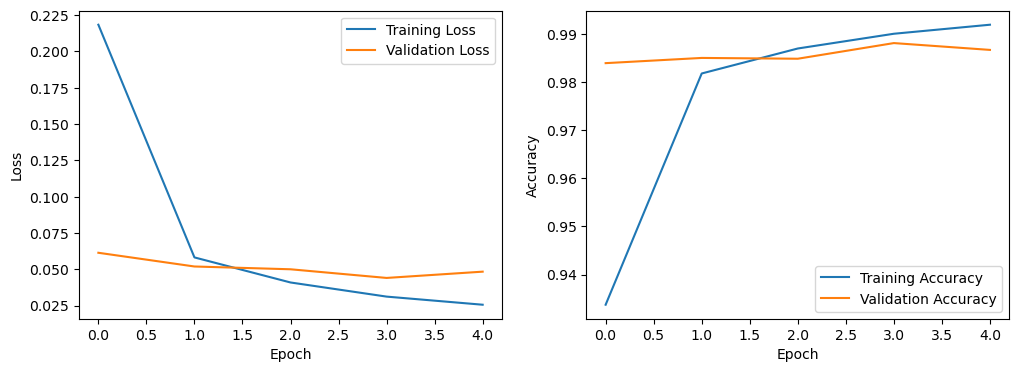

In [9]:
plot_curves(history)

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9840 - loss: 0.0484
Test Loss: 0.040629006922245026
Test Accuracy: 0.9878000020980835


In [11]:
predictions = model.predict(test_images)
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
[[ 977    0    0    0    0    0    0    2    1    0]
 [   0 1133    1    0    0    0    0    1    0    0]
 [   1    0 1027    0    0    0    0    3    1    0]
 [   0    0    1 1006    0    1    0    1    1    0]
 [   0    1    1    0  978    0    0    0    1    1]
 [   2    0    1    8    0  873    2    1    4    1]
 [   8    5    0    0    1    0  942    0    2    0]
 [   0    5    5    0    0    0    0 1017    1    0]
 [   5    0    3    0    0    1    0    2  962    1]
 [   4    6    2    0    6    3    0   15   10  963]]


In [12]:
# Define class labels for the confusion matrix
class_names = [str(i) for i in range(10)]

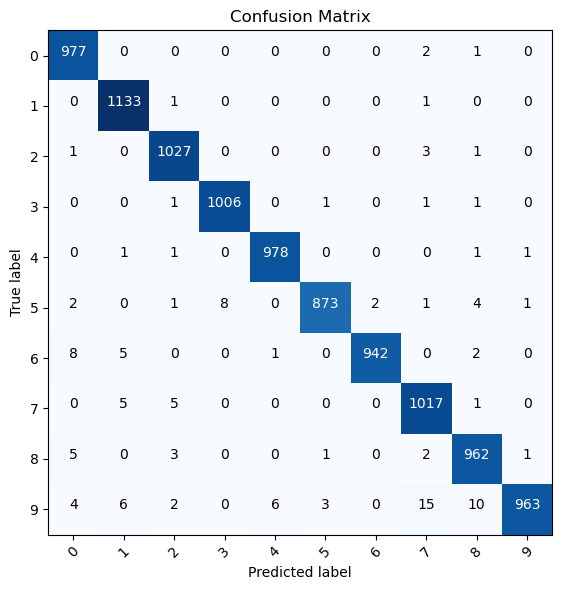

In [15]:
# Plot confusion matrix
plot_confusion_matrix(conf_matrix, classes=class_names)

Fold 1
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9917 - loss: 0.0257 - val_accuracy: 0.9914 - val_loss: 0.0290
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9943 - loss: 0.0183 - val_accuracy: 0.9909 - val_loss: 0.0279
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9952 - loss: 0.0133 - val_accuracy: 0.9926 - val_loss: 0.0231
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9963 - loss: 0.0118 - val_accuracy: 0.9938 - val_loss: 0.0200
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9970 - loss: 0.0092 - val_accuracy: 0.9920 - val_loss: 0.0267


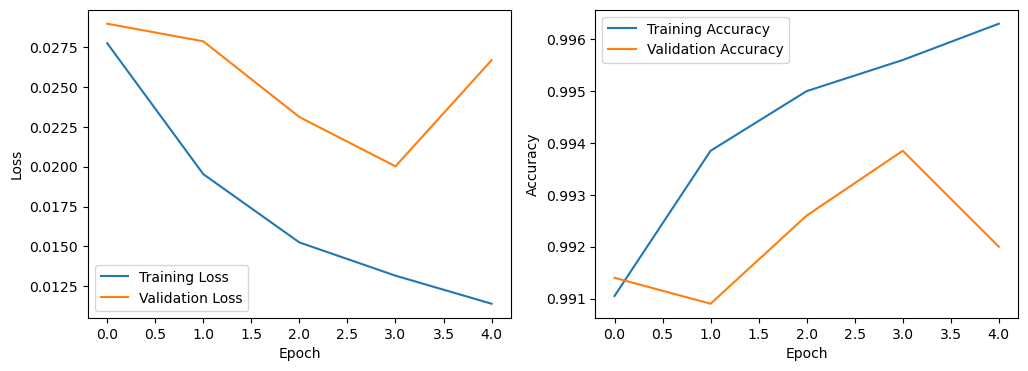

Fold 2
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9942 - loss: 0.0209 - val_accuracy: 0.9947 - val_loss: 0.0150
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9972 - loss: 0.0093 - val_accuracy: 0.9953 - val_loss: 0.0122
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.9978 - loss: 0.0067 - val_accuracy: 0.9941 - val_loss: 0.0177
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9982 - loss: 0.0069 - val_accuracy: 0.9946 - val_loss: 0.0159
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9978 - loss: 0.0065 - val_accuracy: 0.9932 - val_loss: 0.0214


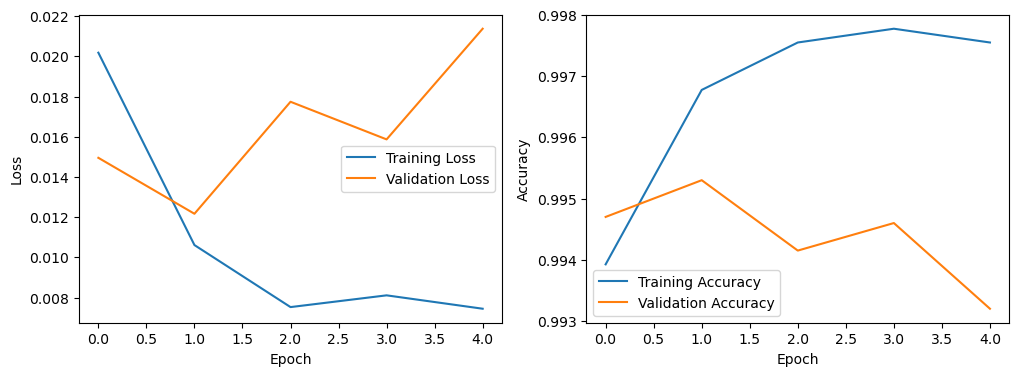

Fold 3
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9947 - loss: 0.0169 - val_accuracy: 0.9975 - val_loss: 0.0073
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9983 - loss: 0.0047 - val_accuracy: 0.9966 - val_loss: 0.0105
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9982 - loss: 0.0052 - val_accuracy: 0.9965 - val_loss: 0.0113
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9986 - loss: 0.0035 - val_accuracy: 0.9964 - val_loss: 0.0134
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9976 - loss: 0.0073 - val_accuracy: 0.9954 - val_loss: 0.0150


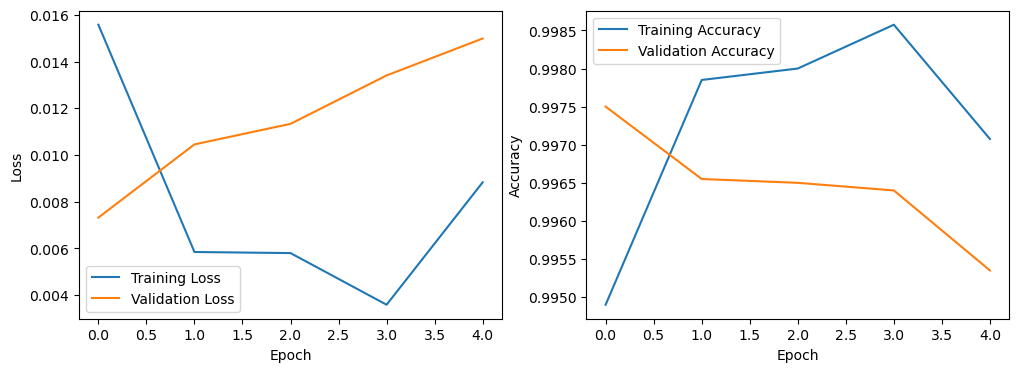

In [16]:
kf = KFold(n_splits=3)
fold = 1
for train_index, val_index in kf.split(train_images):
    print("Fold", fold)
    fold += 1
    train_x, val_x = train_images[train_index], train_images[val_index]
    train_y, val_y = train_labels[train_index], train_labels[val_index]
    history = model.fit(train_x, train_y, epochs=5, batch_size=64, validation_data=(val_x, val_y))
    plot_curves(history)
